('This is the Rho', 2/(r*(r/2 + 1)**2))
('this is the Mass', 32*pi*(log(R + 2) + 2/(R + 2)) - 32*pi*(log(2) + 1))
('Our Velocity Equation is:', sqrt((32*pi*(log(R + 2) + 2/(R + 2)) - 32*pi*(log(2) + 1))/R))


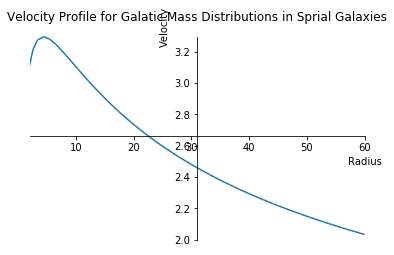

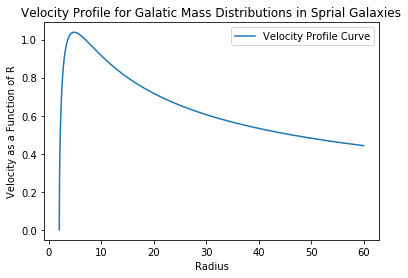

In [16]:
import sympy as smp
from sympy import *
import matplotlib.pyplot as plt
from scipy import *
import numpy as np
from sympy.plotting import plot
from scipy.integrate import *
import scipy as sp
import matplotlib as mpl

mpl = "qt4gg"

#sybolic part of the code

def Full():

#define constants, variables and functions

    R=Symbol('R')
    r=Symbol('r')
    M=Function('M')
    Rho=Function('Rho')
    theta = Symbol('theta')
    #following values set for NFW profile in Milky Way
    alpha=1
    beta=3
    gamma=1
    Rho_0=  1 #2.8*10**37 #units: kg/kpc
    Rs = 2#16.1 #in kpc
    h = 2 #height of milky way disk, currently in kpc
    G = 1 #6.67191*10**-11 # m**3/kg*s**2 +_ 0.000009*10**-11

    #density profile
    #Rho =Rho_0/ ((1+(r/Rs)**2)**(3/2))
    Rho = Rho_0/ ( (r/Rs)**gamma * (1+(r/Rs)**alpha)**((beta-gamma)/alpha) )

    print("This is the Rho", Rho)
    #print(Rho)

    #Having trouble with the integral using partial fraction
    #supposed to integrate Rho times the cylindrical jacobian over R to get the
    #mass as a function of the Radius Assuming I for a think disk
    #try adding in the central bluge. Assume that the buldge is a sphere of same density profile
    M = smp.integrate(2*smp.pi*r**2*h*Rho,(r,0,R)) + 2*smp.pi*smp.integrate(r**2*Rho,(r,0,R))*smp.integrate(smp.sin(theta),(theta,0,2*smp.pi))
    print("this is the Mass", M)
    #print(M)

    #send it through the symbolic integrator
    #set the limits of the Radius here
    Rmin=2
    Rmax=60

    #this show the function we wish to plot
    #RH = integrate(M,(R))
    #print "Our Mass-Radius Equation is:"
    #print(RH)
    #define the velocity function as a functions
    #of R is
    #V is only a first order Newtonian approax
    V = smp.sqrt(G*M/R)
    print ("Our Velocity Equation is:", V)
    #print(V)
#now we have to prepare the antiderivative of the equation for plotting
#using the sympy plotting package.
    plot(V,(R,Rmin,Rmax),nb_of_points = 500,xlabel = ("Radius"), ylabel = ("Velocity"),title = ("Velocity Profile for Galatic Mass Distributions in Sprial Galaxies"))
#this returns a plot of Velocity V and Radius This is good for the Star and Gas
#distributions

#time to use numpy to do evalutation numercially
#need to get this working, the integrator is not working. I want to put
#in a list and get an integrated list back. That way I can plot the function
#plus the integral


#Goal: do the same thing as the symbolic program but numerically
# take a given density profile and integrate it to get the
# mass, then take that mass and solve fot the velocity, plot the velocity as a function
# of radius, show that the symbolic and Numeric parts coincide

# define the numerical function
    #define R  as a linear space
    R_min = 2
    R_max = 60
    R_step = 10000
    R = np.linspace(R_min,R_max,R_step)


    #define the density profile
    Rho =Rho_0/ ( (R/Rs)**gamma * (1+(R/Rs)**alpha)**((beta-gamma)/alpha) )
    #Somethings worng with this one

    #Rho_0/ ( (R/Rs)**gamma * (1+(R/Rs)**alpha)**((beta-gamma)/alpha) ) Somethings worng with this one

    #Rho_0/ ((1+(R/Rs)**2)**(3/2)) works well

    #Get Rho as a list
    #Rho = Rho(R,params)

    J = 2*np.pi*R #The Jacodian for the integral
    U = J*Rho #the integrand
    #print(U)

    #Get the mass as a list
    #requieres an integral
    M =  cumtrapz(U, x=R, dx = R_step, initial = 0)
    #M = M(Rho,R,params)
    #print M

    #velocity given by Assuming that the gravational protential is constant
    # and the is a first order Newtionian approax
    V = np.sqrt((G*M)/R)

    #plotting the result
    #get plots to appear together
    plt.figure
    plt.plot(R,V,label = "Velocity Profile Curve")
    #plt.plot(R,U, label = 'RU curve ')
    #plt.plot(R,M, label = 'RM curve ')
    plt.legend()
    plt.title("Velocity Profile for Galatic Mass Distributions in Sprial Galaxies")
    plt.xlabel("Radius")
    plt.ylabel("Velocity as a Function of R")
    plt.show()

if __name__ == '__Full__':
    Full()
Full()

#Numerical()

